In [1]:
import os
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
%config InlineBackend.figure_format='retina'

In [2]:
eeg_data_train = np.load('../data/things-eeg2_preproc/preprocessed_eeg_training.npy', allow_pickle=True).item()
eeg_data_test = np.load('../data/things-eeg2_preproc/preprocessed_eeg_test.npy', allow_pickle=True).item()

print('Training EEG data shape:')
print(eeg_data_train['preprocessed_eeg_data'].shape)
print('(Training image conditions × Training EEG repetitions × EEG channels × '
    'EEG time points)')

print('\nTest EEG data shape:')
print(eeg_data_test['preprocessed_eeg_data'].shape)
print('(Test image conditions × Test EEG repetitions × EEG channels × '
    'EEG time points)')

Training EEG data shape:
(16540, 4, 17, 100)
(Training image conditions × Training EEG repetitions × EEG channels × EEG time points)

Test EEG data shape:
(200, 80, 17, 100)
(Test image conditions × Test EEG repetitions × EEG channels × EEG time points)


In [13]:
eeg_data_train.keys()

dict_keys(['preprocessed_eeg_data', 'ch_names', 'times'])

In [14]:
eeg_data_train['times']

array([-0.2 , -0.19, -0.18, -0.17, -0.16, -0.15, -0.14, -0.13, -0.12,
       -0.11, -0.1 , -0.09, -0.08, -0.07, -0.06, -0.05, -0.04, -0.03,
       -0.02, -0.01,  0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,
        0.07,  0.08,  0.09,  0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,
        0.16,  0.17,  0.18,  0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,
        0.25,  0.26,  0.27,  0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,
        0.34,  0.35,  0.36,  0.37,  0.38,  0.39,  0.4 ,  0.41,  0.42,
        0.43,  0.44,  0.45,  0.46,  0.47,  0.48,  0.49,  0.5 ,  0.51,
        0.52,  0.53,  0.54,  0.55,  0.56,  0.57,  0.58,  0.59,  0.6 ,
        0.61,  0.62,  0.63,  0.64,  0.65,  0.66,  0.67,  0.68,  0.69,
        0.7 ,  0.71,  0.72,  0.73,  0.74,  0.75,  0.76,  0.77,  0.78,
        0.79])

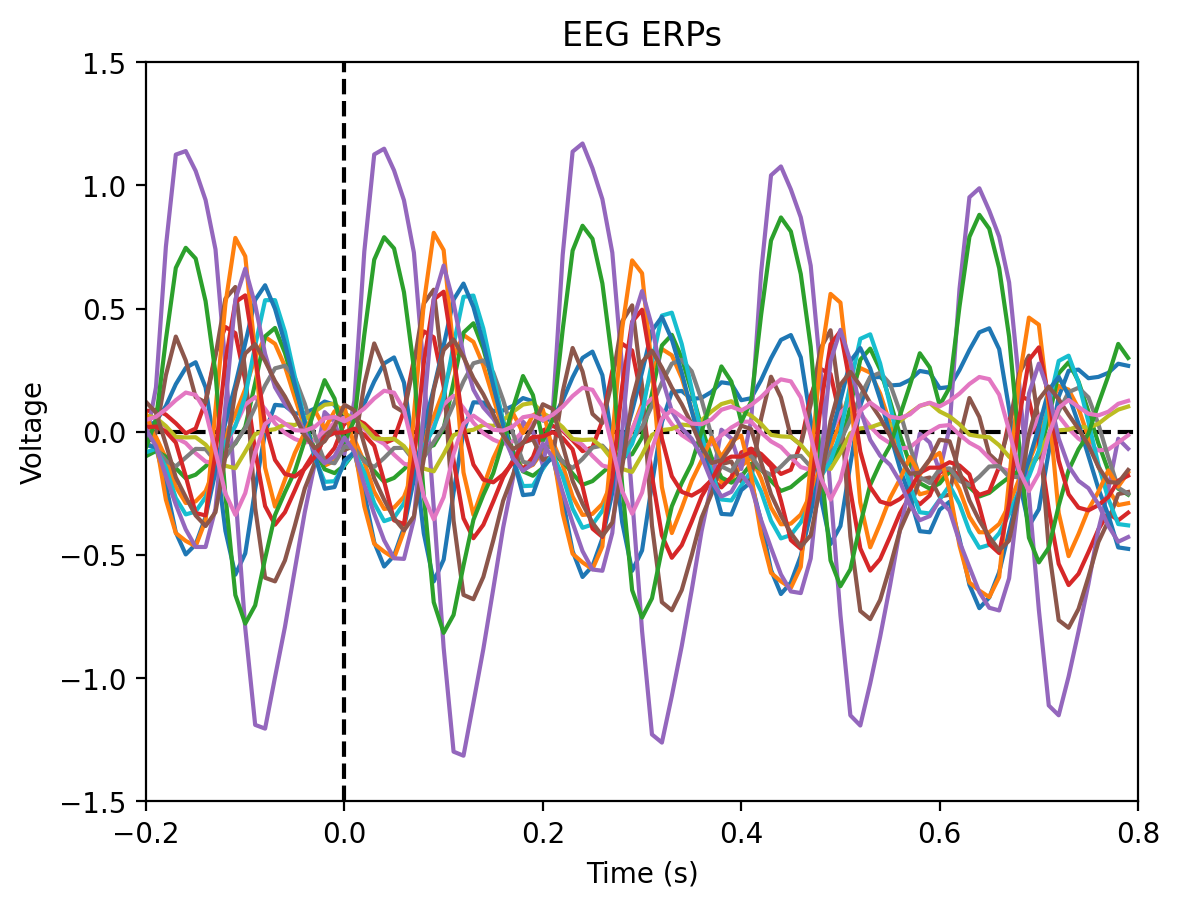

In [7]:
erp_data_train = np.mean(eeg_data_train['preprocessed_eeg_data'], 1)
erp_data_test = np.mean(eeg_data_test['preprocessed_eeg_data'], 1)
erp_data_all = np.mean(np.append(erp_data_train, erp_data_test, 0), 0)

plt.figure()
plt.plot([-.2, .8], [0, 0], 'k--', [0, 0], [-1.5, 1.5], 'k--')
plt.plot(eeg_data_train['times'], np.transpose(erp_data_all));
plt.xlabel('Time (s)');
plt.xlim(left=-.2, right=.8)
plt.ylabel('Voltage');
plt.ylim(bottom=-1.5, top=1.5)
plt.title('EEG ERPs');

In [9]:
img_metadata = np.load('../data/things-eeg2_preproc/image_metadata.npy',allow_pickle=True).item()

n_train_img = len(img_metadata['train_img_concepts'])
n_train_concepts = len(np.unique(img_metadata['train_img_concepts']))
n_train_img_per_concept = int(n_train_img / n_train_concepts)
print('Training images: ' + str(n_train_img))
print('Image concepts: ' + str(n_train_concepts))
print('Images per concept: '+ str(n_train_img_per_concept))

n_test_img = len(img_metadata['test_img_concepts'])
n_test_concepts = len(np.unique(img_metadata['test_img_concepts']))
n_test_img_per_concept = int(n_test_img / n_test_concepts)
print('\nTest images: ' + str(n_test_img))
print('Image concepts: ' + str(n_test_concepts))
print('Images per concept: '+ str(n_test_img_per_concept))

Training images: 16540
Image concepts: 1654
Images per concept: 10

Test images: 200
Image concepts: 200
Images per concept: 1


Training EEG single image data shape:
(4, 17, 100)
(Training EEG repetitions × EEG channels × EEG time points)



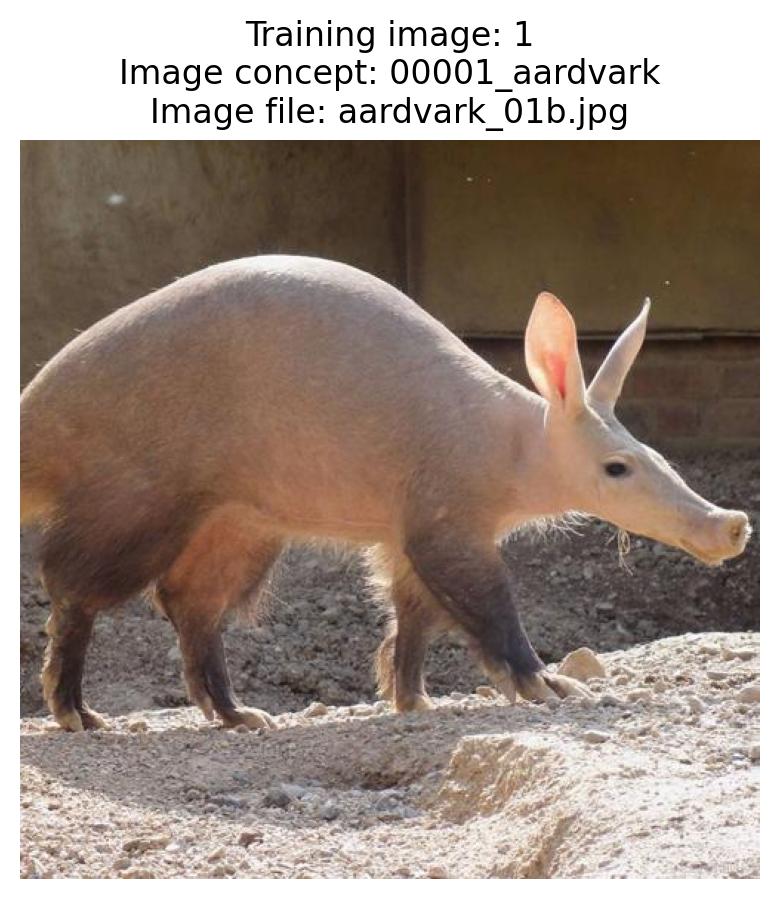

In [8]:
train_img_idx =  0 #@param {type:"integer"}

eeg_data_single_image = eeg_data_train['preprocessed_eeg_data'][train_img_idx]
print('Training EEG single image data shape:')
print(eeg_data_single_image.shape)
print('(Training EEG repetitions × EEG channels × EEG time points)\n')

train_img_dir = os.path.join('../data/things-eeg2_preproc', 'training_images',
	img_metadata['train_img_concepts'][train_img_idx],
	img_metadata['train_img_files'][train_img_idx])
train_img = Image.open(train_img_dir).convert('RGB')

plt.figure()
plt.axis('off')
plt.imshow(train_img)
plt.title('Training image: ' + str(train_img_idx+1) + '\nImage concept: ' +\
	img_metadata['train_img_concepts'][train_img_idx] + '\nImage file: ' +\
	img_metadata['train_img_files'][train_img_idx]);

Test EEG single image data shape:
(80, 17, 100)
(Test EEG repetitions × EEG channels × EEG time points)



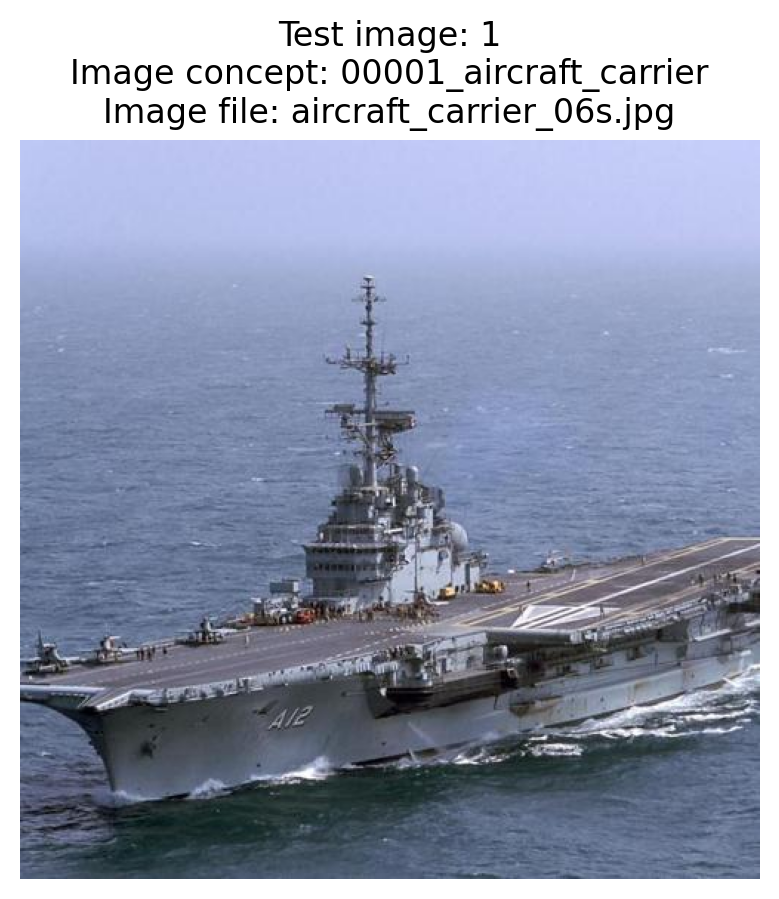

In [9]:
test_img_idx =  0 #@param {type:"integer"}

eeg_data_single_image = eeg_data_test['preprocessed_eeg_data'][train_img_idx]
print('Test EEG single image data shape:')
print(eeg_data_single_image.shape)
print('(Test EEG repetitions × EEG channels × EEG time points)\n')

test_img_dir = os.path.join('../data/things-eeg2_preproc', 'test_images',
	img_metadata['test_img_concepts'][test_img_idx],
	img_metadata['test_img_files'][test_img_idx])
test_img = Image.open(test_img_dir).convert('RGB')

plt.figure()
plt.axis('off')
plt.imshow(test_img)
plt.title('Test image: ' + str(test_img_idx+1) + '\nImage concept: ' +\
	img_metadata['test_img_concepts'][test_img_idx] + '\nImage file: ' +\
	img_metadata['test_img_files'][test_img_idx]);

In [10]:
train_img_idx =  0 #@param {type:"integer"}

# eeg_data_single_image = eeg_data_train['preprocessed_eeg_data'][train_img_idx]

train_img_dir = os.path.join('../data/things-eeg2_preproc', 'training_images',
	img_metadata['train_img_concepts'][train_img_idx],
	img_metadata['train_img_files'][train_img_idx])
train_img = np.array(Image.open(train_img_dir).convert('RGB'))
train_img.shape

(500, 500, 3)

In [5]:
eeg_data_train['preprocessed_eeg_data'].shape

(16540, 4, 17, 100)

In [6]:
eeg_data_train['preprocessed_eeg_data'].mean(1).shape

(16540, 17, 100)

In [3]:
train_thingseeg2_avg = eeg_data_train['preprocessed_eeg_data'].mean(1)[:,:,20:40]
np.save('../data/things-eeg2_preproc/train_thingseeg2_avg_200ms.npy', train_thingseeg2_avg)
train_thingseeg2_avg = eeg_data_train['preprocessed_eeg_data'].mean(1)[:,:,20:60]
np.save('../data/things-eeg2_preproc/train_thingseeg2_avg_400ms.npy', train_thingseeg2_avg)
train_thingseeg2_avg = eeg_data_train['preprocessed_eeg_data'].mean(1)[:,:,20:80]
np.save('../data/things-eeg2_preproc/train_thingseeg2_avg_600ms.npy', train_thingseeg2_avg)
train_thingseeg2_avg = eeg_data_train['preprocessed_eeg_data'].mean(1)[:,:,20:]
np.save('../data/things-eeg2_preproc/train_thingseeg2_avg_800ms.npy', train_thingseeg2_avg)

In [3]:
train_thingseeg2_null = eeg_data_train['preprocessed_eeg_data'].mean(1)[:,:,0:20]
np.save('../data/things-eeg2_preproc/train_thingseeg2_null.npy', train_thingseeg2_null)

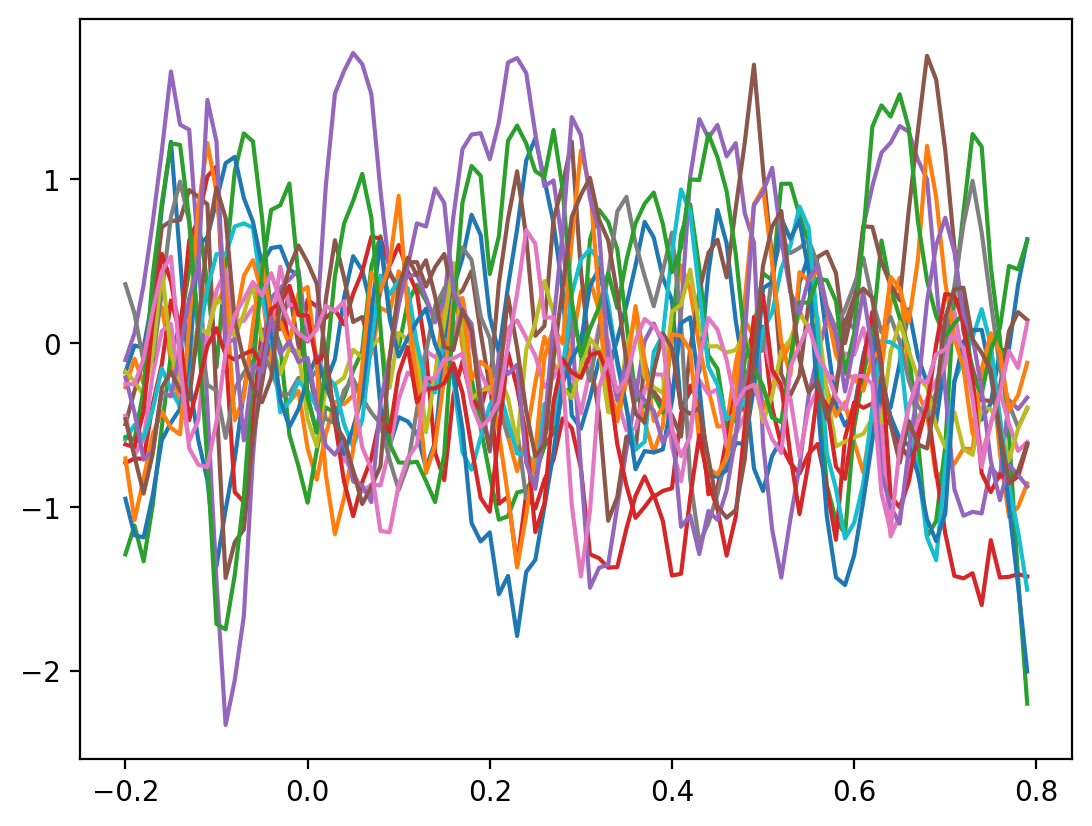

In [36]:
train_thingseeg2_avg = eeg_data_train['preprocessed_eeg_data'].mean(1)
plt.plot(eeg_data_train['times'], train_thingseeg2_avg[0].T)

In [23]:
test_thingseeg2_avg = eeg_data_test['preprocessed_eeg_data'].mean(1)[:,:,20:40]
np.save('../data/things-eeg2_preproc/test_thingseeg2_avg_200ms.npy', test_thingseeg2_avg)
test_thingseeg2_avg = eeg_data_test['preprocessed_eeg_data'].mean(1)[:,:,20:60]
np.save('../data/things-eeg2_preproc/test_thingseeg2_avg_400ms.npy', test_thingseeg2_avg)
test_thingseeg2_avg = eeg_data_test['preprocessed_eeg_data'].mean(1)[:,:,20:80]
np.save('../data/things-eeg2_preproc/test_thingseeg2_avg_600ms.npy', test_thingseeg2_avg)
test_thingseeg2_avg = eeg_data_test['preprocessed_eeg_data'].mean(1)[:,:,20:]
np.save('../data/things-eeg2_preproc/test_thingseeg2_avg_800ms.npy', test_thingseeg2_avg)

In [4]:
test_thingseeg2_null = eeg_data_test['preprocessed_eeg_data'].mean(1)[:,:,0:20]
np.save('../data/things-eeg2_preproc/test_thingseeg2_null.npy', test_thingseeg2_null)

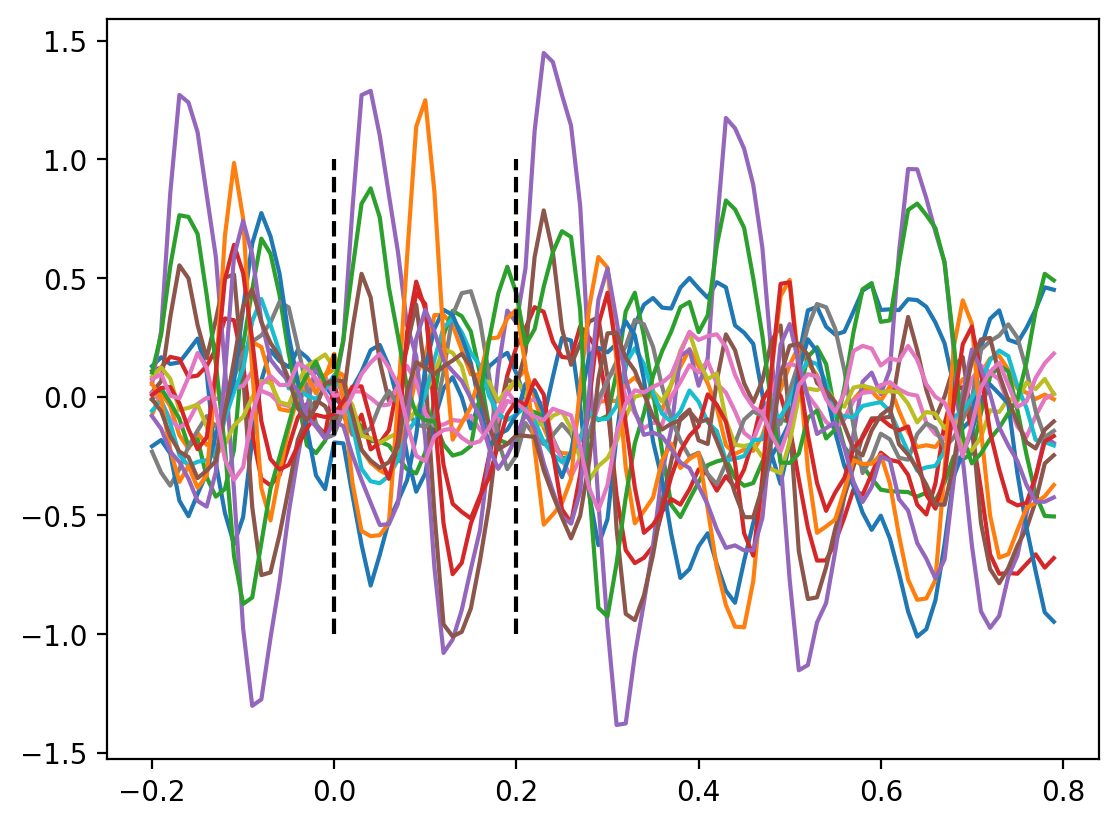

In [39]:
test_thingseeg2_avg = eeg_data_test['preprocessed_eeg_data'].mean(1)
plt.plot(eeg_data_test['times'], test_thingseeg2_avg[0].T)
plt.vlines(0, -1, 1, 'k', '--')
plt.vlines(.2, -1, 1, 'k', '--')

In [13]:
' '.join(img_metadata['test_img_concepts'][0].split('_')[1:])

'aircraft carrier'

In [14]:
np.load('../data/things-eeg2_preproc/test_concepts.npy')

array(['aircraft carrier', 'antelope', 'backscratcher', 'balance beam',
       'banana', 'baseball bat', 'basil', 'basketball', 'bassoon',
       'baton4', 'batter', 'beaver', 'bench', 'bike', 'birthday cake',
       'blowtorch', 'boat', 'bok choy', 'bonnet', 'bottle opener',
       'brace', 'bread', 'breadbox', 'bug', 'buggy', 'bullet', 'bun',
       'bush', 'calamari', 'candlestick', 'cart', 'cashew', 'cat',
       'caterpillar', 'cd player', 'chain', 'chaps', 'cheese', 'cheetah',
       'chest2', 'chime', 'chopsticks', 'cleat', 'cleaver', 'coat',
       'cobra', 'coconut', 'coffee bean', 'coffeemaker', 'cookie',
       'cordon bleu', 'coverall', 'crab', 'creme brulee', 'crepe', 'crib',
       'croissant', 'crow', 'cruise ship', 'crumb', 'cupcake', 'dagger',
       'dalmatian', 'dessert', 'dragonfly', 'dreidel', 'drum',
       'duffel bag', 'eagle', 'eel', 'egg', 'elephant', 'espresso',
       'face mask', 'ferry', 'flamingo', 'folder', 'fork', 'freezer',
       'french horn', 'fruit

In [24]:
test_path = '../data/things-eeg2_preproc/test_thingseeg2_avg.npy'
test_meg = np.load(test_path, mmap_mode='r')
# test_meg = test_meg.reshape(test_meg.shape[0], -1)

In [25]:
test_meg.shape

(200, 17, 20)

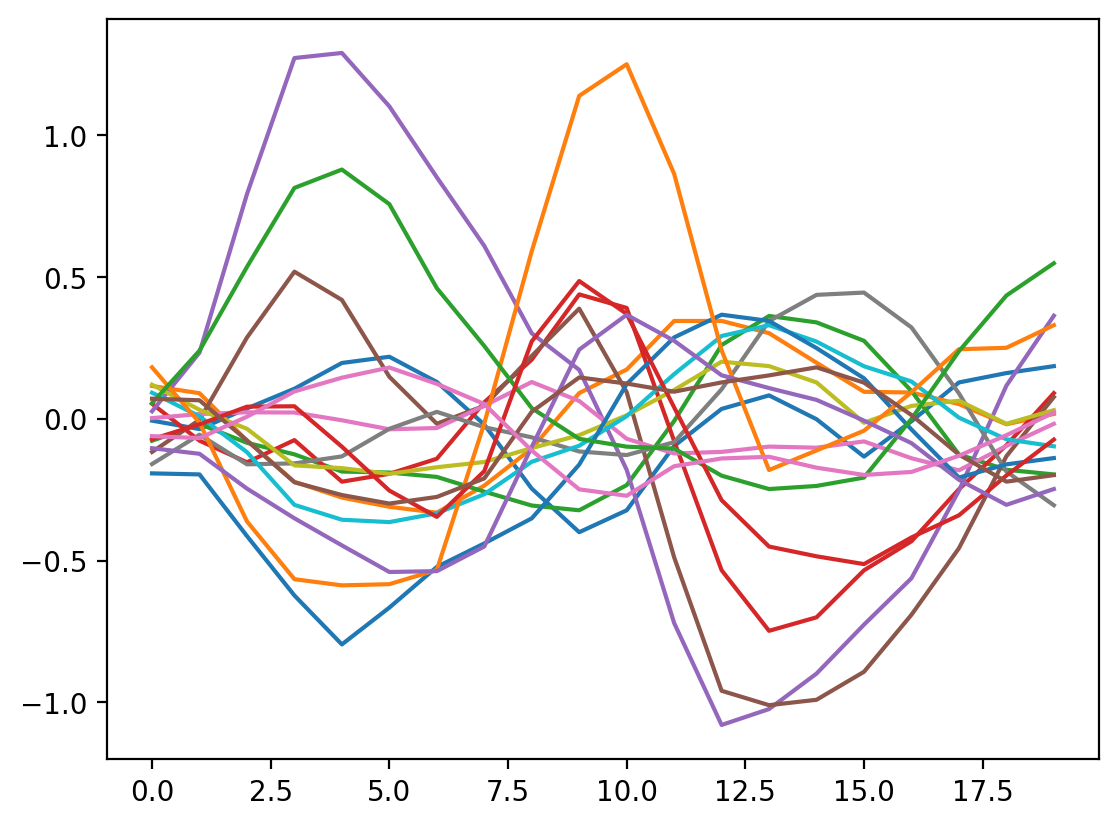

In [26]:
plt.plot(test_meg[0].T)

In [27]:
train_path = '../data/things-eeg2_preproc/train_thingseeg2_avg.npy'
train_meg = np.load(train_path, mmap_mode='r')
# train_meg = train_meg.reshape(train_meg.shape[0], -1)

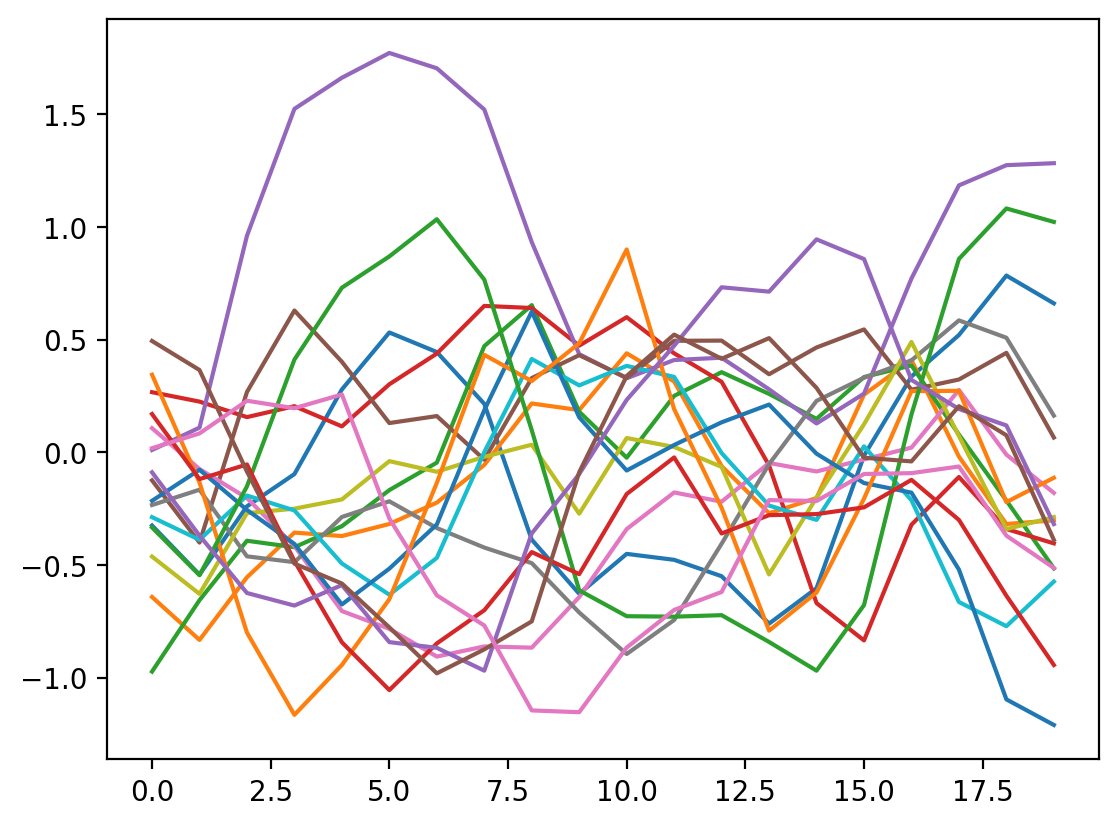

In [28]:
plt.plot(train_meg[0].T)

In [29]:
train_meg.shape

(16540, 17, 20)

In [30]:
a = np.array([[[111, 112, 113],[121, 122, 123],[131, 132, 133]],
              [[211, 212, 213],[221, 222, 223],[231, 232, 233]],
              [[311, 312, 313],[321, 322, 323],[331, 332, 333]]])

In [34]:
a[0]

array([[111, 112, 113],
       [121, 122, 123],
       [131, 132, 133]])

In [33]:
a.reshape(a.shape[0], -1)

array([[111, 112, 113, 121, 122, 123, 131, 132, 133],
       [211, 212, 213, 221, 222, 223, 231, 232, 233],
       [311, 312, 313, 321, 322, 323, 331, 332, 333]])